# ３章 記述統計と単回帰分析

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

from sklearn import linear_model

In [3]:
pwd

'/home/komiyama/books/data_science_book1'

In [4]:
mkdir chap3

In [3]:
cd ./chap3/

/home/komiyama/books/data_science_book1/chap3


In [6]:
pwd

'/home/komiyama/books/data_science_book1/chap3'

## データの概要

In [10]:
# ZIPファイルをダウンロードするためのライブラリ
import requests,zipfile
from io import StringIO
import io

In [20]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [21]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [4]:
student_data_math = pd.read_csv('student-mat.csv')

In [23]:
student_data_math

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
390,"MS;""M"";20;""U"";""LE3"";""A"";2;2;""services"";""servic..."
391,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."
392,"MS;""M"";21;""R"";""GT3"";""T"";1;1;""other"";""other"";""c..."
393,"MS;""M"";18;""R"";""LE3"";""T"";3;2;""services"";""other""..."


In [9]:
# データの読み込み
# 区切りが;なので注意
student_data_math = pd.read_csv('student-mat.csv',sep=';')

In [26]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
?pd.read_csv
# sep以外にもデータ名やヘッダーなどを指定できる

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

In [29]:
# すべてのカラムの情報をチェックする
student_data_math.info()
# RangeIndex : 395 なので395個のデータがあるとわかる,すべてnon-nullである。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [30]:
cat student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

In [31]:
# 質的データ
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [33]:
# 量的データ
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [35]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

In [36]:
student_data_math.groupby('sex')['studytime'].mean()

sex
F    2.278846
M    1.764706
Name: studytime, dtype: float64

## 記述統計

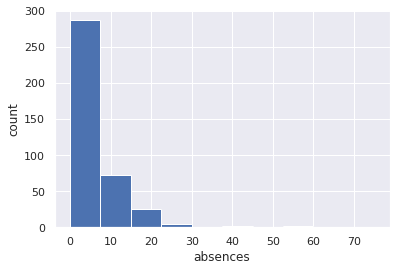

In [37]:
# ヒストグラム

# 欠席数のヒストグラム
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [38]:
# 統計量
print('平均値 : ',student_data_math['absences'].mean())
print('中央値 : ',student_data_math['absences'].median())
print('最頻値 : ',student_data_math['absences'].mode())

平均値 :  5.708860759493671
中央値 :  4.0
最頻値 :  0    0
dtype: int64


In [39]:
print('分散 : ',student_data_math['absences'].var(ddof=0))
print('標準偏差 : ',student_data_math['absences'].std(ddof=0))

分散 :  63.887389841371515
標準偏差 :  7.992958766400057


In [40]:
# 要約統計量
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [42]:
# 四分位範囲（75パーセンタイル - 25パーセンタイル）
student_data_math['absences'].describe()[6]-student_data_math['absences'].describe()[4]

8.0

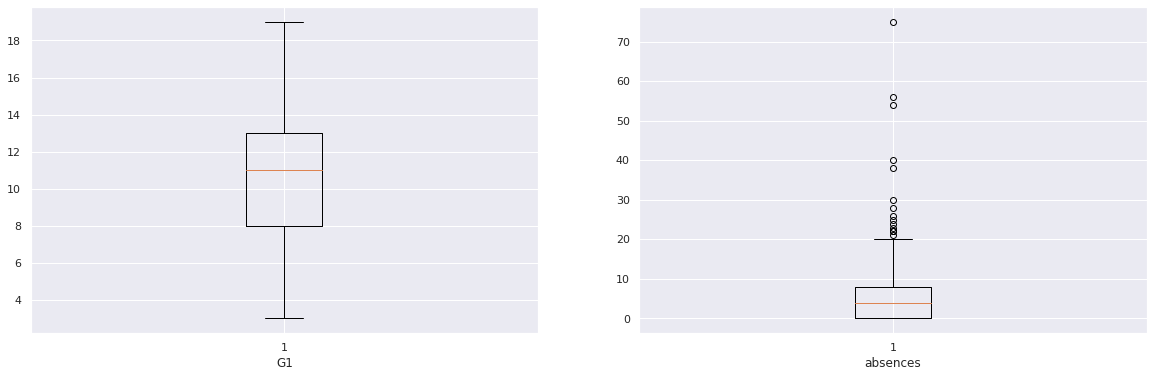

In [45]:
# 箱ひげ図 (boxplot)
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.boxplot(student_data_math['G1'])
plt.xlabel('G1')
plt.grid(True)

plt.subplot(1,2,2)
plt.boxplot(student_data_math['absences'])
plt.xlabel('absences')
plt.grid(True)

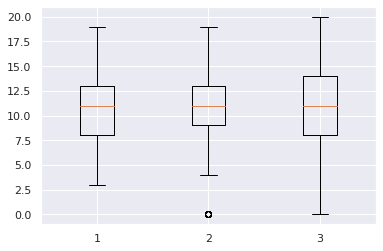

In [47]:
plt.boxplot([student_data_math['G1'],student_data_math['G2'],student_data_math['G3']])
plt.grid(True)

In [48]:
# 変動係数 (CV = 標準偏差/平均値)

student_data_math.std(ddof=0)/student_data_math.mean()


age           0.076330
Medu          0.397673
Fedu          0.431019
traveltime    0.481058
studytime     0.411791
failures      2.222501
famrel        0.227042
freetime      0.308334
goout         0.357645
Dalc          0.600679
Walc          0.561409
health        0.390651
absences      1.400097
G1            0.303881
G2            0.350641
G3            0.439324
dtype: float64

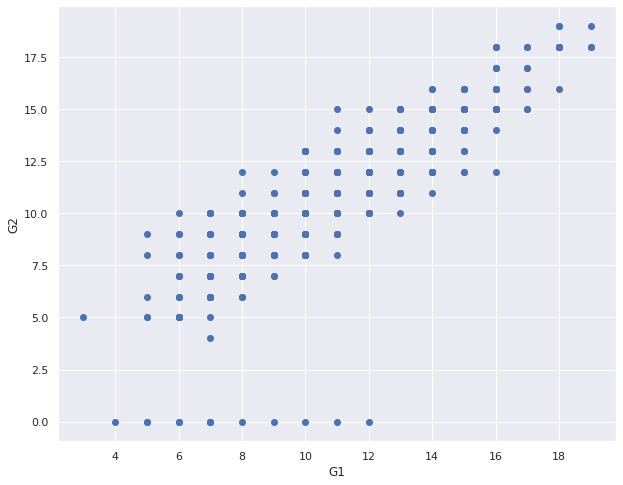

In [51]:
#散布図と相関係数
plt.figure(figsize=(10,8))

plt.plot(student_data_math['G1'],student_data_math['G2'],'o')

plt.xlabel('G1')
plt.ylabel('G2')
plt.grid(True)

In [52]:
# 共分散 (numpyで計算)
np.cov(student_data_math['G1'], student_data_math['G3'],ddof=0)
# 1の分散　共分散
# 共分散　 2の分散

array([[10.989, 12.157],
       [12.157, 20.936]])

In [53]:
# 相関係数 (scipyで計算)
sp.stats.pearsonr(student_data_math['G1'],student_data_math['G3'])
# (相関係数, p値)

(0.801467932017414, 9.001430312277865e-90)

In [55]:
# 相関係数(numpyで計算)
np.corrcoef(student_data_math['G1'], student_data_math['G3'])

array([[1.   , 0.801],
       [0.801, 1.   ]])

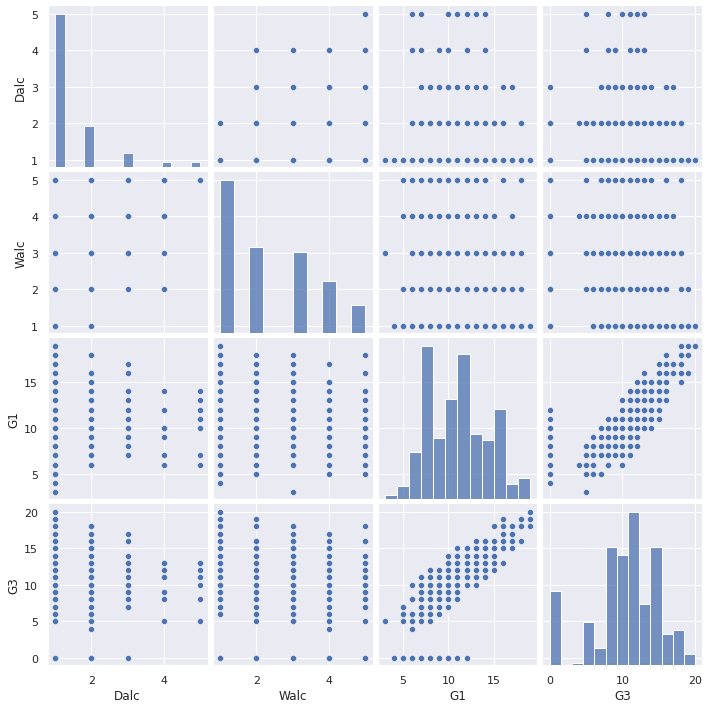

In [56]:
# seaborn (データの抽出あり（2-4-5）)

sns.pairplot(student_data_math[['Dalc','Walc','G1','G3']])
# 外側の括弧はdataframeの列指定、内側の括弧は配列
plt.grid(True)

In [57]:
# 週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

In [58]:
student_data_math.groupby('Dalc')['G1'].mean()

Dalc
1    11.155797
2    10.306667
3    10.576923
4     9.777778
5    10.444444
Name: G1, dtype: float64

In [5]:
# 練習問題3-1
student_por = pd.read_csv('student-por.csv',sep=';')

In [62]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [63]:
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [10]:
merge = pd.merge(student_data_math,student_por,on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet',],suffixes=('_math','_por'))

In [11]:
merge

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [16]:
merge.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


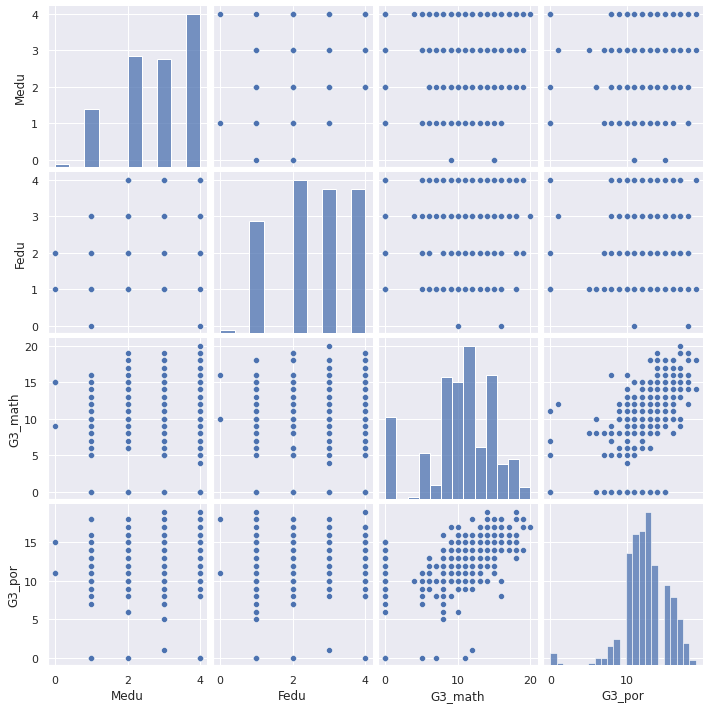

In [18]:
import seaborn as sns

sns.pairplot(merge[['Medu','Fedu','G3_math','G3_por']])

## 単回帰分析

In [19]:

from sklearn import linear_model

# インスタンスの作成
reg = linear_model.LinearRegression()

In [23]:
type(student_data_math.loc[:,['G1']])

pandas.core.frame.DataFrame

In [24]:
student_data_math.loc[:,['G1']]

,G1
0,5
1,5
2,7
3,15
4,6
...,...
390,9
391,14
392,10
393,11


In [26]:
type(student_data_math.loc[:,['G1']].values)

numpy.ndarray

In [27]:
student_data_math.loc[:,['G1']].values

array([[ 5],
       [ 5],
       [ 7],
       [15],
       [ 6],
       [15],
       [12],
       [ 6],
       [16],
       [14],
       [10],
       [10],
       [14],
       [10],
       [14],
       [14],
       [13],
       [ 8],
       [ 6],
       [ 8],
       [13],
       [12],
       [15],
       [13],
       [10],
       [ 6],
       [12],
       [15],
       [11],
       [10],
       [ 9],
       [17],
       [17],
       [ 8],
       [12],
       [ 8],
       [15],
       [15],
       [12],
       [14],
       [ 7],
       [12],
       [19],
       [ 8],
       [10],
       [ 8],
       [11],
       [19],
       [15],
       [ 7],
       [12],
       [11],
       [11],
       [ 8],
       [10],
       [ 8],
       [14],
       [14],
       [ 9],
       [15],
       [10],
       [10],
       [ 8],
       [10],
       [10],
       [16],
       [13],
       [ 7],
       [ 8],
       [16],
       [13],
       [10],
       [ 8],
       [12],
       [11],
       [ 9],
       [11],

In [28]:
X = student_data_math.loc[:,['G1']].values

In [32]:
type(student_data_math['G3'].values)

numpy.ndarray

In [33]:
Y = student_data_math['G3'].values

In [34]:
reg.fit(X,Y)

LinearRegression()

In [37]:
print('回帰係数：',reg.coef_)
print('切片：',reg.intercept_)

回帰係数： [1.106]
切片： -1.6528038288004616


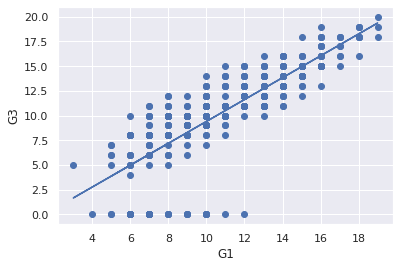

In [39]:
plt.scatter(X,Y)
plt.xlabel('G1')
plt.ylabel('G3')
plt.plot(X,reg.predict(X))
plt.grid(True)

In [40]:
# 決定係数
print('決定係数：',reg.score(X,Y))

決定係数： 0.64235084605227


In [44]:
#練習問題3-4
X = student_por.loc[:,['G1']].values # 説明変数は2D(ここでは2D配列を1Dで利用)
Y = student_por['G3'].values # 目的変数は1D

reg_por = linear_model.LinearRegression()
reg_por.fit(X,Y)

print('回帰係数：',reg_por.coef_)
print('切片：',reg_por.intercept_)
print('決定係数：',reg_por.score(X,Y))

回帰係数： [0.973]
切片： 0.8203984121064565
決定係数： 0.6829156800171083


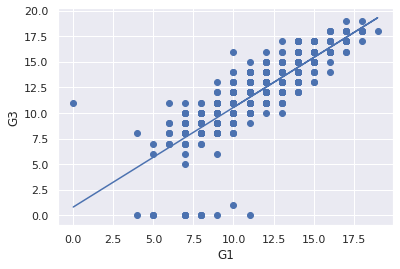

In [46]:
plt.scatter(X,Y)
plt.xlabel('G1')
plt.ylabel('G3')
plt.plot(X,reg_por.predict(X))
plt.grid(True)

回帰係数： [-0.064]
切片： 12.138800862687443
決定係数： 0.008350131955637385


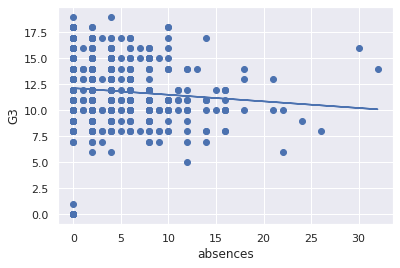

In [48]:
# 練習問題3-6

X = student_por.loc[:,['absences']].values # 説明変数は2D(ここでは2D配列を1Dで利用)
Y = student_por['G3'].values # 目的変数は1D

reg_por = linear_model.LinearRegression()
reg_por.fit(X,Y)

print('回帰係数：',reg_por.coef_)
print('切片：',reg_por.intercept_)
print('決定係数：',reg_por.score(X,Y))

plt.scatter(X,Y)
plt.xlabel('absences')
plt.ylabel('G3')
plt.plot(X,reg_por.predict(X))
plt.grid(True)